# NYC Art Installation Analysis from NYC Open Source Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_json('https://data.cityofnewyork.us/resource/3r2x-bnmj.json')

df.head(300)

,program_initiative,year,title,artist,partner,site_location,borough,site_type,project_type,latitude,longitude,installation,removal
0,Arterventions,2024.0,Audubon Ave Community Street Mural,Mildor Chevalier,StreetLab,Audubon Ave between 165th and 166th Streets,Manhattan,Asphalt Pedestrian Space,Asphalt Mural,40.838768,-73.939639,2024-10-01T00:00:00.000,NaN
1,Arterventions,2024.0,Climate Week: The Burning World & Hudson Eye,Jeffrey Gibson,DUMBO BID,Manhattan Bridge Anchorage at Pearl Street and...,Brooklyn,Bridge Wall,Projection,40.703032,-73.987722,2024-09-23T00:00:00.000,2024-09-27T00:00:00.000
2,Asphalt Art Activations,2024.0,"BX Love, Currents of the Future",Dennis RedMoon Darkeem,NYC DOT Public Realm Unit,Pedestrian spaces on Jennings St,Bronx,Asphalt Pedestrian Space,Asphalt Mural,40.495570,-73.534100,2024-10-05T00:00:00.000,2025-09-05T00:00:00.000
3,Arterventions,2024.0,Holiday projections,Various Artists,DUMBO BID,Manhattan Bridge Anchorage at Pearl Street and...,Brooklyn,Bridge Wall,Projection,40.703032,-73.987722,2024-11-15T00:00:00.000,2024-12-31T00:00:00.000
4,Special Projects,2024.0,Aurora Dragon,Singha Hon,NYC DOT Public Realm Unit,Park Row between Frankfort and Worth Streets,Manhattan,Asphalt Pedestrian Space,Asphalt Mural,40.711860,-74.004080,2024-10-18T00:00:00.000,2025-09-18T00:00:00.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,Art Display Case Exhibits,2013.0,There is No US Without U,VA NYHHS Veterans,Downtown Brooklyn Partnership,Willoughby Plaza at Willoughby St. and Pearl St.,Brooklyn,Plaza,Art Display Cases,40.692304,-73.988661,2013-05-22T00:00:00.000,2013-08-13T00:00:00.000
296,Arterventions,2021.0,2021 Photoville Recap,Photoville + Various Artists,DUMBO BID,Manhattan Bridge Anchorage at Pearl Street and...,Brooklyn,Bridge,Projection,40.703267,-73.987589,2021-11-26T00:00:00.000,2021-12-01T00:00:00.000
297,Community Commissions,2009.0,Urban Garden,Pasqualina Azzarello,Recycle-a-Bicycle,Queens Plaza S. & Vernon Blvd.,Queens,Fence,Sculpture,40.754340,-73.949355,2009-06-04T00:00:00.000,2010-05-04T00:00:00.000
298,Barrier Beautification,2015.0,Jazz City,Jessie Contour,New York Cares,Vernon Blvd. btwn 31st Ave. & 40th Ave.,Queens,Jersey Barriers,Mural,40.768940,-73.935866,2015-10-09T00:00:00.000,2016-09-09T00:00:00.000


### Checking how many entries there are until July 5th, 2025

In [3]:
df.shape

(509, 13)

#### So how are these commissions categorized?

In [4]:
df['program_initiative'].value_counts()

program_initiative
Arterventions                267
Community Commissions         76
Special Projects              53
Barrier Beautification        48
Asphalt Art Activations       23
Art Display Case Exhibits     21
Art Partners                  17
Asphalt Pedestrian Space       1
Name: count, dtype: int64

#### Has this community initiative been successful over the years? Has there been an increase in projects after the pandemic?

In [5]:
df['year'].value_counts()

year
2024.0    41
2021.0    41
2022.0    36
2019.0    35
2023.0    35
2013.0    35
2011.0    32
2018.0    30
2010.0    29
2016.0    27
2014.0    27
2017.0    26
2012.0    25
2025.0    24
2009.0    21
2015.0    19
2020.0    14
2008.0     9
Name: count, dtype: int64

#### I want to make a bar graph of these years so I can analyze a smaller set of data than the 503 entries since 2008.

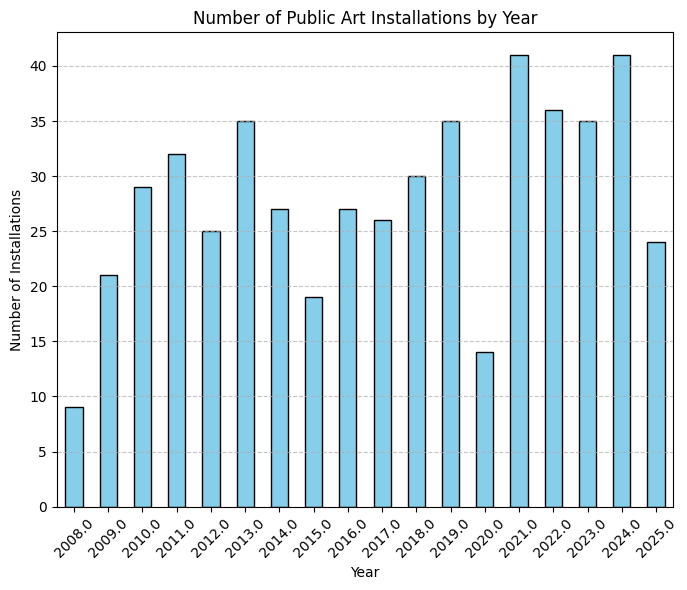

In [6]:
year_counts = df['year'].value_counts().sort_index()
plt.figure(figsize=(7, 6))
year_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Number of Public Art Installations by Year')
plt.xlabel('Year')
plt.ylabel('Number of Installations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Wow, there was a huge uptick post-pandemic! I will focus on the art installations from 2021-2025.

In [7]:
recent_public_art = df[df['year'].between(2021, 2025)]

In [8]:
recent_public_art.shape

(177, 13)

#### Great! Analyzing 174 entries is much more manageable. Now let's see which organizations and partners are responsible for these art installations.

In [9]:
recent_public_art['partner'].value_counts().head(10)

partner
DUMBO BID                              25
NYC DOT                                21
Garment District Alliance              14
Union Square Partnership                6
Flatiron NoMad Partnership              5
NYC DOT Public Realm Unit               5
NYC DOT School Safety                   4
Downtown Brooklyn Partnership           4
NYC DOT Bike Unit                       3
DUMBO BID and Street Theory Gallery     3
Name: count, dtype: int64

#### NYC DOT is the second-highest contributor of art, but it is its own art program. I wonder where they chose to place the art pieces...

In [10]:
recent_public_art[recent_public_art['partner'] == 'NYC DOT']

,program_initiative,year,title,artist,partner,site_location,borough,site_type,project_type,latitude,longitude,installation,removal
6,Special Projects,2024.0,Weaving Together,Cynthia Alberto,NYC DOT,"Vernon Boulevard, from 44th Drive to 30th Road...",All boroughs,Car-Free Event,Interactive intervention,NaN,NaN,2024-07-27T00:00:00.000,2025-02-28T00:00:00.000
54,Special Projects,2023.0,191st Street Tunnel Beautification Project,Denise Coke,NYC DOT,"191st St. Subway Tunnel, W 191st St. & Broadway",Manhattan,Tunnel,Mural,40.856574,-73.932567,2023-09-23T00:00:00.000,2024-08-23T00:00:00.000
126,Special Projects,2024.0,EcoHarmony,Natalie Wood,NYC DOT,Broadway between West 38th Street and West 39t...,Manhattan,NaN,Interactive Sculpture,40.739483,-73.989733,2024-04-20T00:00:00.000,2024-04-20T00:00:00.000
168,Special Projects,2024.0,Kelp Parade,Amanda Thackray and Wendell Jeffrey,NYC DOT,Broadway between 22nd Street and 21st Street,Manhattan,NaN,Interactive Sculpture,40.753200,-73.987190,2024-04-20T00:00:00.000,2024-04-20T00:00:00.000
182,Special Projects,2023.0,191st Street Tunnel Beautification Project,Daniel Bonilla,NYC DOT,"191st St. Subway Tunnel, W 191st St. & Broadway",Manhattan,Tunnel,Mural,40.856574,-73.932567,2023-09-23T00:00:00.000,2024-08-23T00:00:00.000
223,Special Projects,2022.0,Summer Streets Art and Culture Hub,Various Artists,NYC DOT,Lafayette Street and Park Avenue to 109th Stre...,Manhattan,Car-Free Event,Various,NaN,NaN,2022-08-01T00:00:00.000,2022-08-31T00:00:00.000
261,Special Projects,2022.0,Car-Free Earth Day,Various Artists,NYC DOT,"Broadway, East 17th Street to West 42nd Street...",Manhattan/Bronx,Car-Free Event,Various,NaN,NaN,2022-04-23T00:00:00.000,NaN
284,Special Projects,2023.0,191st Street Tunnel Beautification Project,Carla Torres,NYC DOT,"191st St. Subway Tunnel, W 191st St. & Broadway",Manhattan,Tunnel,Mural,40.856574,-73.932567,2023-09-23T00:00:00.000,2024-08-23T00:00:00.000
316,Barrier Beautification,2021.0,Caribbean Breeze,Marie Saint-Cyr,NYC DOT,Columbia Street between Atlantic Avenue and Co...,Brooklyn,Jersey Barriers,Mural,40.691833,-73.999496,2021-05-01T00:00:00.000,NaN
340,Special Projects,2023.0,191st Street Tunnel Beautification Project,Vicky Azcoitia,NYC DOT,"191st St. Subway Tunnel, W 191st St. & Broadway",Manhattan,Tunnel,Mural,40.856574,-73.932567,2023-09-23T00:00:00.000,2024-08-23T00:00:00.000


#### Now I want to check which installations DUMBO BID is supporting.

In [11]:
recent_public_art[recent_public_art['partner'] == 'DUMBO BID']

,program_initiative,year,title,artist,partner,site_location,borough,site_type,project_type,latitude,longitude,installation,removal
1,Arterventions,2024.0,Climate Week: The Burning World & Hudson Eye,Jeffrey Gibson,DUMBO BID,Manhattan Bridge Anchorage at Pearl Street and...,Brooklyn,Bridge Wall,Projection,40.703032,-73.987722,2024-09-23T00:00:00.000,2024-09-27T00:00:00.000
3,Arterventions,2024.0,Holiday projections,Various Artists,DUMBO BID,Manhattan Bridge Anchorage at Pearl Street and...,Brooklyn,Bridge Wall,Projection,40.703032,-73.987722,2024-11-15T00:00:00.000,2024-12-31T00:00:00.000
9,Arterventions,2022.0,Light Year 2022,Various Artists,DUMBO BID,Manhattan Bridge Anchorage at Pearl Street and...,Brooklyn,Bridge,Projection,40.703032,-73.987722,NaN,NaN
15,Arterventions,2021.0,Light Year,Various Artists,DUMBO BID,Manhattan Bridge Anchorage at Pearl Street and...,Brooklyn,Bridge,Projection,40.703267,-73.987589,NaN,NaN
16,Arterventions,2021.0,At Home Heroes,Photoville,DUMBO BID,Manhattan Bridge Anchorage at Pearl Street and...,Brooklyn,Bridge,Projection,40.703267,-73.987589,NaN,NaN
40,Arterventions,2024.0,was this the face,Emily and Jamie Erekson,DUMBO BID,Manhattan Bridge Anchorage at Adams Street,Brooklyn,Bridge Wall,Projection,40.703032,-73.987722,2024-10-10T00:00:00.000,2024-10-13T00:00:00.000
77,Arterventions,2023.0,Holiday projections,Various Artists,DUMBO BID,"BQE Wall, Manhattan Bridge Anchorage on Adams ...",Brooklyn,Bridge,Projection,40.703032,-73.987722,2023-11-10T00:00:00.000,2023-12-31T00:00:00.000
121,Arterventions,2021.0,2021 Holiday Tree Compilation,Various Artists,DUMBO BID,Manhattan Bridge Anchorage at Pearl Street and...,Brooklyn,Bridge,Projection,40.703267,-73.987589,2021-12-02T00:00:00.000,2021-12-31T00:00:00.000
123,Arterventions,2023.0,Human Impacts Institute,Various Artists,DUMBO BID,Manhattan Bridge Anchorage at Pearl Street and...,Brooklyn,Bridge,Projection,40.703032,-73.987722,2023-04-22T00:00:00.000,2023-04-22T00:00:00.000
135,Arterventions,2023.0,Light Year 2023,Various Artists,DUMBO BID,Manhattan Bridge Anchorage at Pearl Street and...,Brooklyn,Bridge,Projection,40.703032,-73.987722,2023-01-05T00:00:00.000,2023-08-03T00:00:00.000


In [12]:
recent_public_art[recent_public_art['partner'] == 'NYC DOT Public Realm Unit']

,program_initiative,year,title,artist,partner,site_location,borough,site_type,project_type,latitude,longitude,installation,removal
2,Asphalt Art Activations,2024.0,"BX Love, Currents of the Future",Dennis RedMoon Darkeem,NYC DOT Public Realm Unit,Pedestrian spaces on Jennings St,Bronx,Asphalt Pedestrian Space,Asphalt Mural,40.495570,-73.534100,2024-10-05T00:00:00.000,2025-09-05T00:00:00.000
4,Special Projects,2024.0,Aurora Dragon,Singha Hon,NYC DOT Public Realm Unit,Park Row between Frankfort and Worth Streets,Manhattan,Asphalt Pedestrian Space,Asphalt Mural,40.711860,-74.004080,2024-10-18T00:00:00.000,2025-09-18T00:00:00.000
5,Special Projects,2024.0,To follow the Way is to cherish nature—道在于珍惜自然...,Deanna Lee,NYC DOT Public Realm Unit,Park Row and Frankfort Street,Manhattan,Fence,Vinyl,40.712011,-74.005826,2024-12-13T00:00:00.000,NaN
7,Special Projects,2024.0,The Beauty of Four Life Essentials 衣食住行之美,Chenlin Cai,NYC DOT Public Realm Unit,"Madison Street and Rose Street, St. James Plac...",Manhattan,Asphalt Pedestrian Space,Asphalt Mural,40.711954,-73.999711,2024-10-23T00:00:00.000,2025-09-23T00:00:00.000
377,Special Projects,2024.0,Lucky Passage and The Guardian’s Entrance,Isolina Minjeong,NYC DOT Public Realm Unit,Park Row between Frankfort and Pearl Streets,Manhattan,Concrete Barriers and Bridge Stairwell,Barrier Mural and Wall Mural,40.711860,-74.004080,2024-09-27T00:00:00.000,2024-08-27T00:00:00.000


In [13]:
recent_public_art[recent_public_art['partner'] == 'NYC DOT School Safety']

,program_initiative,year,title,artist,partner,site_location,borough,site_type,project_type,latitude,longitude,installation,removal
11,Asphalt Art Activations,2022.0,Asphalt Art Activations 2022,Ansley Randall,NYC DOT School Safety,Intersection of Amsterdam Avenue and W 190th S...,Manhattan,Asphalt Pedestrian Space,Asphalt Mural,40.853835,-73.926872,NaN,NaN
12,Asphalt Art Activations,2022.0,Bird's Eye View,Mary Carter Talb,NYC DOT School Safety,165th Street and Rogers Place,Bronx,Asphalt Pedestrian Space,Asphalt Mural,40.823890,-73.897304,NaN,NaN
356,Asphalt Art Activations,2022.0,4 Regions,Carla Torres,NYC DOT School Safety,"Intersection of Wren Place, Rex Road and 175th...",Queens,Asphalt Pedestrian Space,Asphalt Mural,40.700313,-73.781324,2022-09-28T00:00:00.000,2023-08-28T00:00:00.000
383,Asphalt Art Activations,2024.0,UpFlow,Craig Anthony Miller,NYC DOT School Safety,Williams Avenue and Stanley Road,Brooklyn,Asphalt Pedestrian Space,Asphalt Mural,40.654112,-73.894697,2024-09-04T00:00:00.000,2025-08-04T00:00:00.000


In [14]:
import geopandas as gpd
from shapely.geometry import Point

In [15]:
dot_school_safety = recent_public_art[recent_public_art['partner'] == 'NYC DOT School Safety']
dot_school_safety['geometry'] = dot_school_safety.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)
gdf = gpd.GeoDataFrame(dot_school_safety, geometry='geometry')

gdf.to_file('dot_school_art.geojson', driver='GeoJSON')

/var/folders/qg/cv33zcsj4ws9kkzr8d2smgrc0000gn/T/ipykernel_6073/3184276184.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dot_school_safety['geometry'] = dot_school_safety.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)
/Users/nikkirosenbloom/.pyenv/versions/3.12.10/lib/python3.12/site-packages/pyogrio/geopandas.py:710: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(


#### I have some entries with missing data for lat/long, and I want to map all of my entries. What are these?

In [16]:
missing_coords = recent_public_art[recent_public_art['latitude'].isna() | recent_public_art['longitude'].isna()]
missing_coords

,program_initiative,year,title,artist,partner,site_location,borough,site_type,project_type,latitude,longitude,installation,removal
6,Special Projects,2024.0,Weaving Together,Cynthia Alberto,NYC DOT,"Vernon Boulevard, from 44th Drive to 30th Road...",All boroughs,Car-Free Event,Interactive intervention,NaN,NaN,2024-07-27T00:00:00.000,2025-02-28T00:00:00.000
139,Arterventions,2024.0,26 Blocks of Joy,Various Artists,Alliance for Paseo Park + Make the Road NY,34th Avenue between 69th Street and 94th Street,Queens,Granite Block,Mural,NaN,NaN,2024-03-23T00:00:00.000,2025-02-22T00:00:00.000
146,Arterventions,2021.0,Rotational Garden,Combo Colab (Carolina Cisneros &Mateo Pinto) +...,"Howard Beach Civic Association, Inc",Lindenwood Roundabout at 153rd Avenue and 88th...,Queens,Roundabout,Sculpture,NaN,NaN,2021-06-24T00:00:00.000,2022-05-24T00:00:00.000
223,Special Projects,2022.0,Summer Streets Art and Culture Hub,Various Artists,NYC DOT,Lafayette Street and Park Avenue to 109th Stre...,Manhattan,Car-Free Event,Various,NaN,NaN,2022-08-01T00:00:00.000,2022-08-31T00:00:00.000
261,Special Projects,2022.0,Car-Free Earth Day,Various Artists,NYC DOT,"Broadway, East 17th Street to West 42nd Street...",Manhattan/Bronx,Car-Free Event,Various,NaN,NaN,2022-04-23T00:00:00.000,NaN
349,Special Projects,2022.0,Summer Streets Art Stop Illustrations,Ebony Bolt,NYC DOT,Lafayette Street and Park Avenue to 109th Stre...,Manhattan,Car-Free Event,Sculpture,NaN,NaN,2022-08-01T00:00:00.000,2022-08-31T00:00:00.000
480,Special Projects,2025.0,Branching,Ishita Jain,NYC DOT,Various sites citywide,All boroughs,Bus Shelter,Digital Illustration,NaN,NaN,2025-04-21T00:00:00.000,2025-06-30T00:00:00.000
486,Art Partners,2025.0,The Avenue,Marissa Molina,Thrive Collective and the Atlantic Ave BID,BQE Overpass North Wall at Atlantic Ave and Co...,Brooklyn,Bridge Wall,Mural,NaN,-73.999307,2025-05-23T00:00:00.000,2026-04-23T00:00:00.000
491,Special Projects,2024.0,NYC Art Stop Letters,Yukiko Izumi,NYC DOT,"Vernon Boulevard, from 44th Drive to 30th Road...",All boroughs,Car-Free Event,Sculpture,NaN,NaN,2024-07-27T00:00:00.000,2024-08-24T00:00:00.000
492,Special Projects,2023.0,Summer Streets Art Stop Illustrations,Angel Garcia,NYC DOT,"Vernon Boulevard, from 44th Drive to 30th Road...",All boroughs,Car-Free Event,Sculpture,NaN,NaN,2023-08-01T00:00:00.000,2023-08-31T00:00:00.000


#### Ahh, these artworks are missing coordinates because they span several streets or sidewalks. I can draw that on a different map, but I want to keep them separate, so I will save them to use later.

In [17]:
missing_coords.to_csv('missing_coords.csv', index=False)

In [18]:
recent_public_art_clean = recent_public_art.dropna(subset=['latitude', 'longitude'])
recent_public_art_clean.shape

(164, 13)

#### Great! Now those 13 entries of artwork taking more space are out of the way, and I can map these 161 entries.

In [19]:
recent_public_art_clean.to_csv('recent_public_art_cleaned.csv', index=False)